In [9]:
###
## Author : Nitin Khanna
## KolmogorovArnoldNetwork (KAN) pseudocode
##
##
## Kolmogorov-Arnold Networks (KAN) refer to a class of neural networks based on the Kolmogorov-Arnold representation theorem.
## This theorem, proposed by Andrey Kolmogorov and later extended by Vladimir Arnold, provides a foundation for representing multivariate
## continuous functions as superpositions of univariate functions.
## 
###

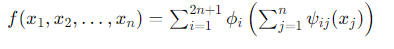

In [10]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

class KolmogorovArnoldNetwork(tf.keras.Model):
    """Kolmogorov-Arnold Network (KAN) for approximating multivariate continuous functions.

    This network architecture is based on the Kolmogorov-Arnold representation theorem.
    It approximates complex functions using a combination of linear and non-linear layers.

    Attributes:
        hidden_units (int): Number of units in the hidden layers.
        linear_combinations (list): List of Dense layers for linear combinations of input features.
        non_linear_functions (list): List of Dense layers for non-linear transformations.
        output_layer (tf.keras.layers.Dense): Output layer of the network.
    """

    def __init__(self, input_dim, hidden_units):
        """
        Initializes the Kolmogorov-Arnold Network.

        Args:
            input_dim (int): Dimensionality of the input features.
            hidden_units (int): Number of units in the hidden layers.
        """
        super(KolmogorovArnoldNetwork, self).__init__()
        self.hidden_units = hidden_units #difines number of hidden units in layer
        self.linear_combinations = [tf.keras.layers.Dense(input_dim) for _ in range(2 * input_dim + 1)]
        # print(self.linear_combinations)
        self.non_linear_functions = [tf.keras.layers.Dense(hidden_units, activation='relu') for _ in range(2 * input_dim + 1)]
        # print(self.non_linear_functions)
        self.output_layer = tf.keras.layers.Dense(1)  # Assuming a single output

    def call(self, inputs):
        """
        Performs the forward pass of the network.

        Args:
            inputs (tf.Tensor): Input tensor.

        Returns:
            tf.Tensor: Output tensor of the network.
        """
        inner_results = []
        for lc_layer, nl_layer in zip(self.linear_combinations, self.non_linear_functions):
            lc_result = lc_layer(inputs)
            nl_result = nl_layer(lc_result)
            inner_results.append(nl_result)
        
        combined_result = tf.reduce_sum(inner_results, axis=0)
        output = self.output_layer(combined_result)
        return output


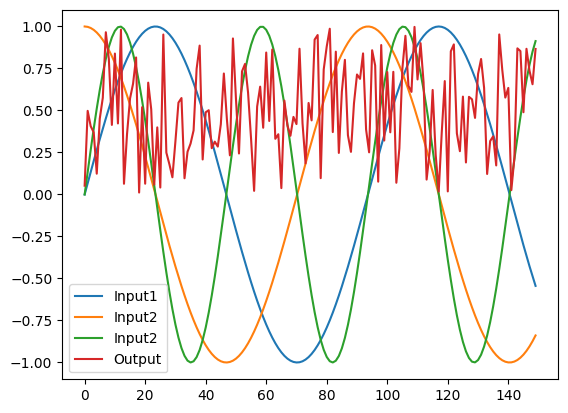

Epoch 1/20
24/24 [==============================] - 1s 7ms/step - loss: 8.5020 - val_loss: 5.8221
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 4.3651 - val_loss: 2.7622
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 2.1033 - val_loss: 1.3006
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1.0659 - val_loss: 0.5792
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5448 - val_loss: 0.2919
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3193 - val_loss: 0.1716
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2134 - val_loss: 0.1220
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1007
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1285 - val_loss: 0.0954
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.0951
Epoch 11/20
24/24 [

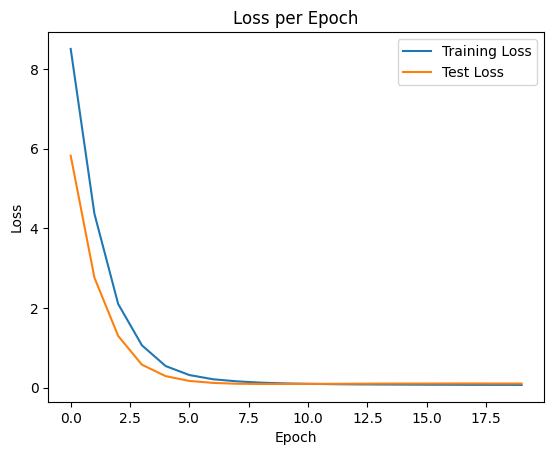

1/1 [==============================] - 0s 309ms/step - loss: 0.1063
Test Loss: 0.106253981590271
1/1 [==============================] - 0s 91ms/step


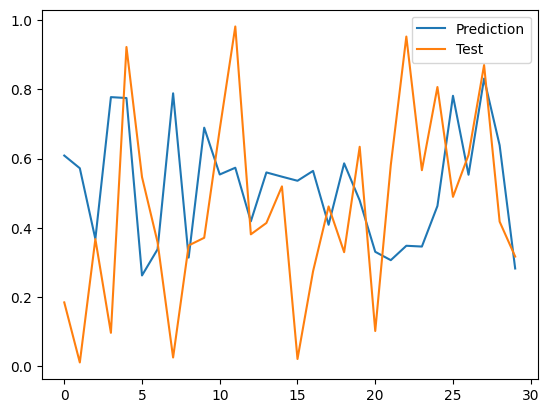

In [36]:

# Generate example data
input_dim = 3  # Example input dimension
t = np.linspace(0, 10, 150)
X = np.column_stack([np.sin(t), np.cos(t),np.sin(2*t)])

# Generate target data y
y = np.random.rand(150, 1)

plt.plot(X[:,0],label='Input1')
plt.plot(X[:,1],label='Input2')
plt.plot(X[:,2],label='Input2')
plt.plot(y,label='Output')
plt.legend()
plt.show()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and compile the model
hidden_units = 10
model = KolmogorovArnoldNetwork(input_dim, hidden_units)
model.compile(optimizer='adam', loss='mse')

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test))

# Plot the loss graph for each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


y_preds = model.predict(X_test)
plt.plot(y_preds, label='Prediction')
plt.plot(y_test, label='Test')

plt.legend()
plt.show()

